## Introduction

**About to the data**

C'est une dataset qui contient une large exemple des ventes des collections de NFT 




Index: The index of the file.

Name: The name of the NFT collection.

Volume_USD: The volume of sales from the NFT collection in United States Dollar (USD).

MarketCapUSD: The market capitalization—total value of the collection's items in circulation—in United States Dollar (USD).

Sales: The number of sales from the NFT collection.

FloorPriceUSD: The lowest price of any NFT in the collection in United States Dollar (USD).


AveragePriceUSD: The average price of an NFT in the collection in United States Dollar (USD).

Owners: The number of owners of NFT's in the collection.

Assets: The number of items in the collection.

OwnerAssetRatio: The ownership percentage of all items in the collection.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
nft = pd.read_csv("./NFT_Top_Collections.csv")

In [ ]:
nft.head()


,Index,Name,Volume,Volume_USD,Market_Cap,Market_Cap_USD,Sales,Floor_Price,Floor_Price_USD,Average_Price,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio,Category,Website,Logo
0,0,basis.markets,27256.63,4.001818e+06,708.145455,103969.91560,366,39.50,5799.3900,74.471667,10933.930100,12,16,75.00,"Collectibles,Digital,Privilege",https://basis.markets/,https://content.solsea.io/files/thumbnail/1636...
1,1,Skeleton Crew Skulls,11381.25,1.670995e+06,106.656000,15659.23392,2075,0.67,98.3694,5.484940,805.298855,103,132,78.03,NaN,https://skeletoncrew.rip/,https://content.solsea.io/files/thumbnail/1633...
2,2,Flippies,6732.19,9.884201e+05,1663.863158,244288.38880,1504,0.80,117.4560,4.476190,657.194239,905,1638,55.25,NaN,https://www.flippies.art/,https://content.solsea.io/files/thumbnail/1632...
3,3,Meerkat Millionaires Country Club,3734.76,5.483375e+05,90.275000,13254.17550,395,3.79,556.4478,9.455089,1388.196109,19,23,82.61,NaN,https://meerkatmillionaires.club/,https://content.solsea.io/files/thumbnail/1632...
4,4,Stylish Studs,3191.15,4.685246e+05,165.000000,24225.30000,729,4.30,631.3260,4.377435,642.694984,28,50,56.00,NaN,https://stylishstuds.io,https://content.solsea.io/files/thumbnail/1632...


In [ ]:
nft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              592 non-null    int64  
 1   Name               592 non-null    object 
 2   Volume             592 non-null    float64
 3   Volume_USD         592 non-null    float64
 4   Market_Cap         592 non-null    float64
 5   Market_Cap_USD     592 non-null    float64
 6   Sales              592 non-null    int64  
 7   Floor_Price        544 non-null    float64
 8   Floor_Price_USD    544 non-null    float64
 9   Average_Price      592 non-null    float64
 10  Average_Price_USD  592 non-null    float64
 11  Owners             592 non-null    int64  
 12  Assets             592 non-null    int64  
 13  Owner_Asset_Ratio  543 non-null    float64
 14  Category           310 non-null    object 
 15  Website            481 non-null    object 
 16  Logo               591 non

In [ ]:
nft.drop(columns = ["Volume","Market_Cap","Floor_Price","Average_Price","Category","Website","Logo"],inplace = True)


In [ ]:
nft.dropna(inplace=True)


In [ ]:
nft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 591
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              540 non-null    int64  
 1   Name               540 non-null    object 
 2   Volume_USD         540 non-null    float64
 3   Market_Cap_USD     540 non-null    float64
 4   Sales              540 non-null    int64  
 5   Floor_Price_USD    540 non-null    float64
 6   Average_Price_USD  540 non-null    float64
 7   Owners             540 non-null    int64  
 8   Assets             540 non-null    int64  
 9   Owner_Asset_Ratio  540 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 46.4+ KB


In [ ]:
nft["Market_Cap_USD"] = nft["Market_Cap_USD"]/nft["Market_Cap_USD"].max()
nft["Volume_USD"] = nft["Volume_USD"]/nft["Volume_USD"].max()

In [ ]:
nft.corr()

,Index,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
Index,1.000000,-0.234445,-0.331022,-0.416273,-0.033973,-0.208543,-0.315575,-0.320982,-0.180560
Volume_USD,-0.234445,1.000000,0.356271,0.238439,0.069615,0.605738,0.144694,0.126606,0.066704
Market_Cap_USD,-0.331022,0.356271,1.000000,0.400295,-0.009540,0.110256,0.414119,0.535009,-0.094358
Sales,-0.416273,0.238439,0.400295,1.000000,-0.034665,-0.034781,0.810149,0.751806,0.028560
Floor_Price_USD,-0.033973,0.069615,-0.009540,-0.034665,1.000000,0.207361,-0.044679,-0.052571,0.092825
Average_Price_USD,-0.208543,0.605738,0.110256,-0.034781,0.207361,1.000000,-0.069190,-0.084522,0.086463
Owners,-0.315575,0.144694,0.414119,0.810149,-0.044679,-0.069190,1.000000,0.908035,0.045991
Assets,-0.320982,0.126606,0.535009,0.751806,-0.052571,-0.084522,0.908035,1.000000,-0.146190
Owner_Asset_Ratio,-0.180560,0.066704,-0.094358,0.028560,0.092825,0.086463,0.045991,-0.146190,1.000000


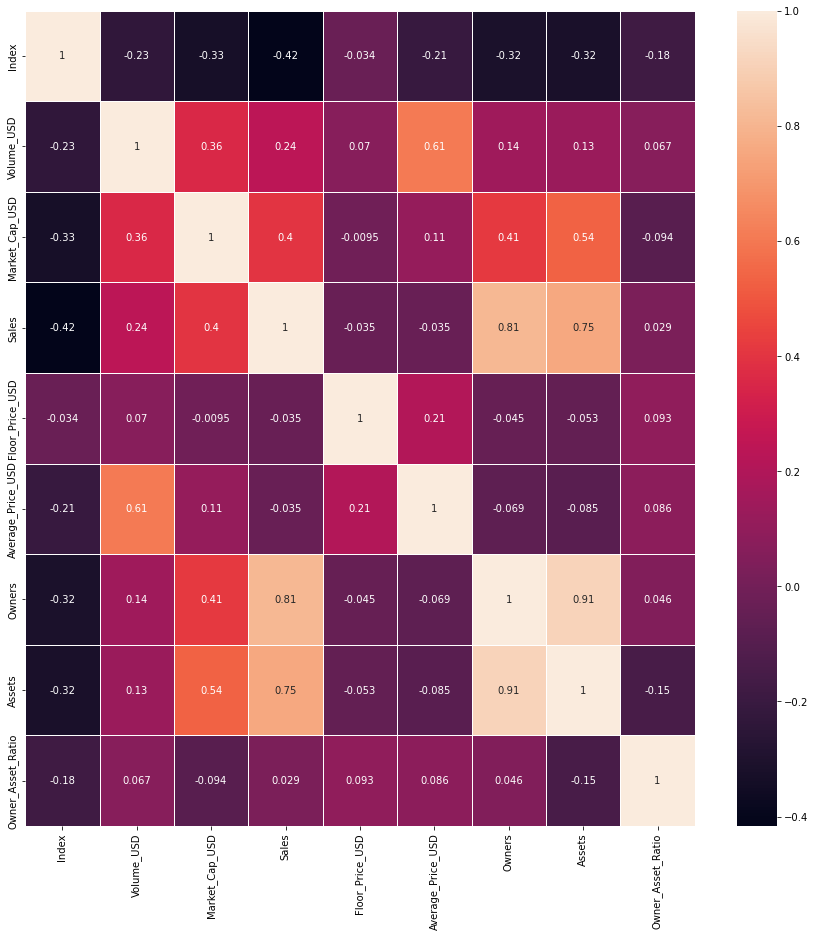

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(nft.corr(),annot=True,linewidths = 1)
plt.show()

In [ ]:
nft.describe()


,Index,Volume_USD,Market_Cap_USD,Sales,Floor_Price_USD,Average_Price_USD,Owners,Assets,Owner_Asset_Ratio
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,297.838889,0.007613,0.019541,177.403704,357.819372,237.532201,58.761111,127.714815,54.224852
std,172.801027,0.049239,0.073970,470.371171,2797.170904,714.737314,139.157205,260.802828,27.568784
min,0.000000,0.000000,0.000000,0.000000,2.936400,0.000000,1.000000,1.000000,0.260000
25%,149.750000,0.000264,0.000000,13.000000,16.150200,41.835335,6.000000,15.000000,33.330000
50%,296.500000,0.000680,0.000071,37.000000,44.046000,95.880622,19.000000,44.000000,57.195000
75%,447.250000,0.002871,0.009780,120.500000,146.820000,203.777320,48.000000,114.250000,72.740000
max,599.000000,1.000000,1.000000,5229.000000,58728.000000,10933.930100,2041.000000,3320.000000,100.000000


In [ ]:
pip install sweetviz

     |████████████████████████████████| 15.1 MB 160 kB/s eta 0:00:01
  Using cached importlib_resources-5.4.0-py3-none-any.whl (28 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
df_nft=pd.DataFrame(nft)

In [ ]:
import sweetviz as sv

my_report = sv.analyze(df_nft)
my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



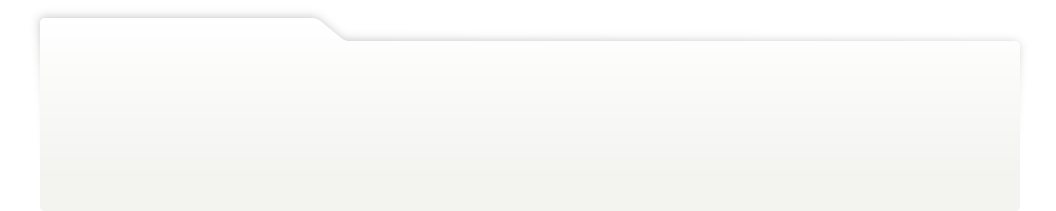
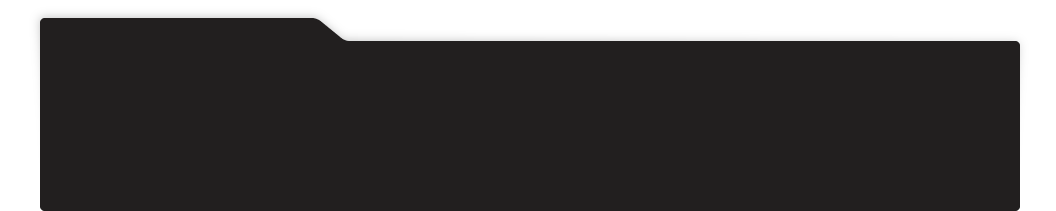
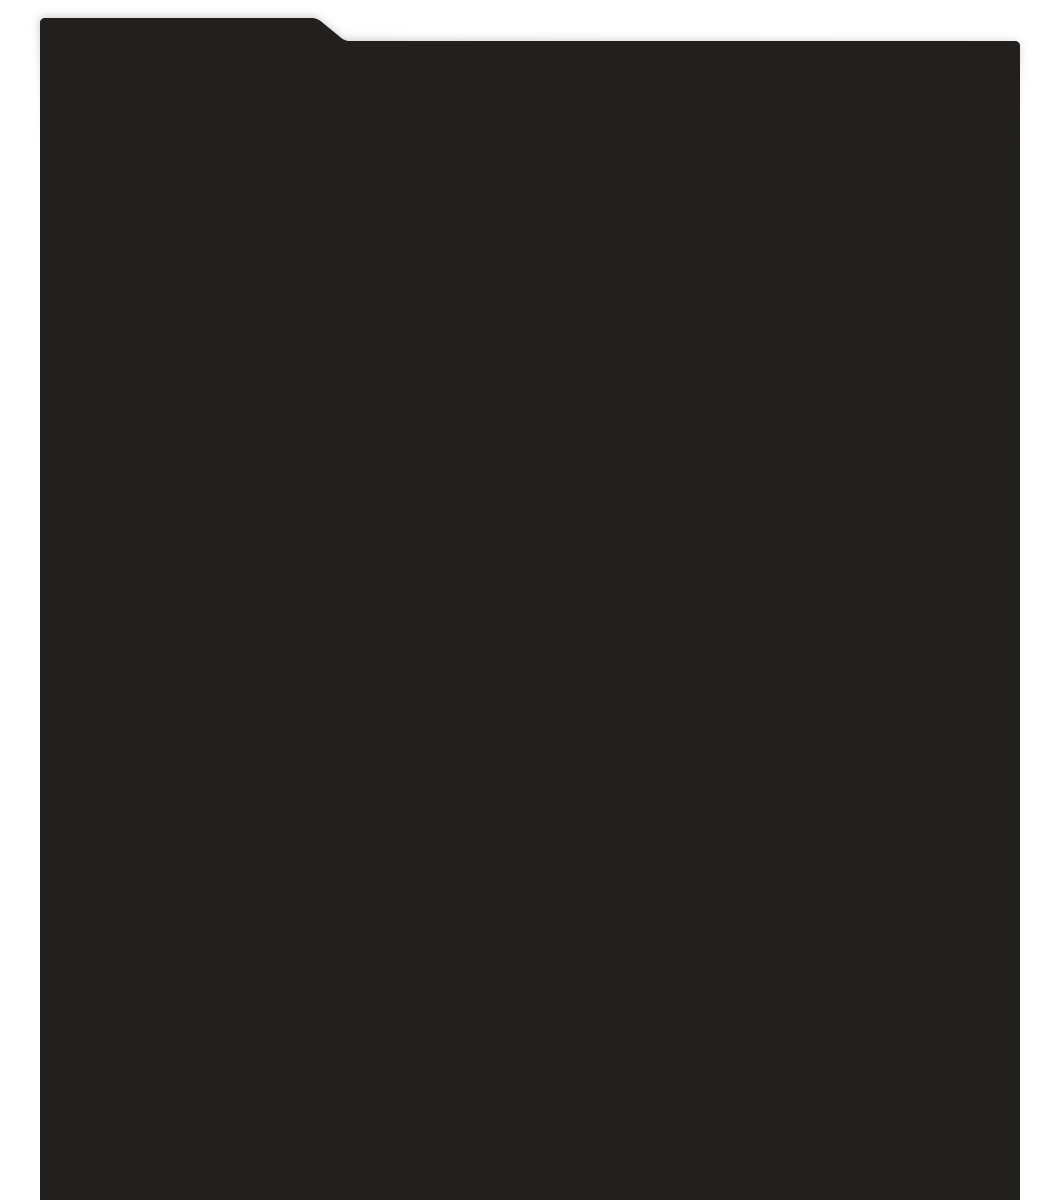
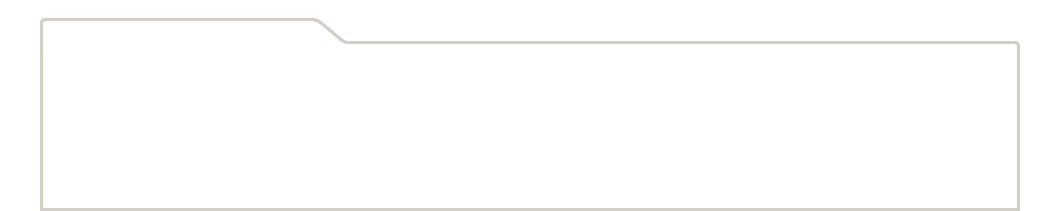
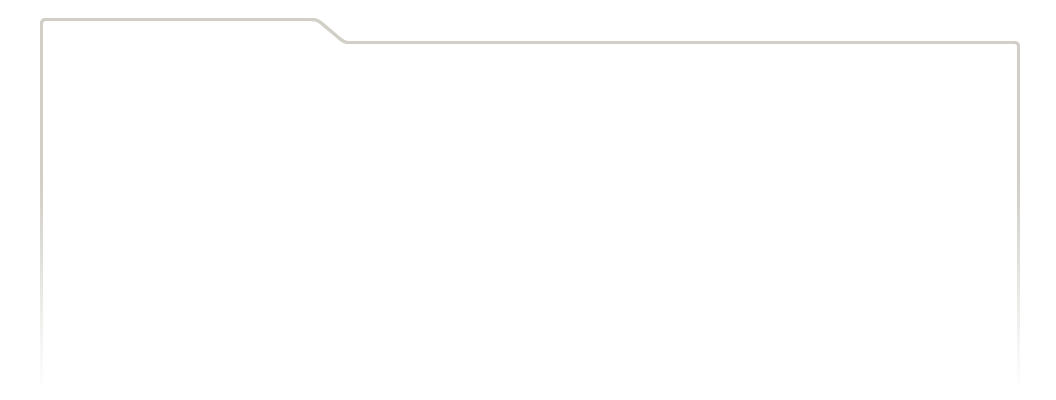
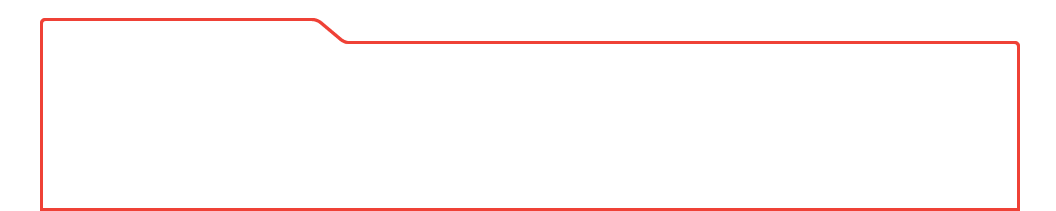
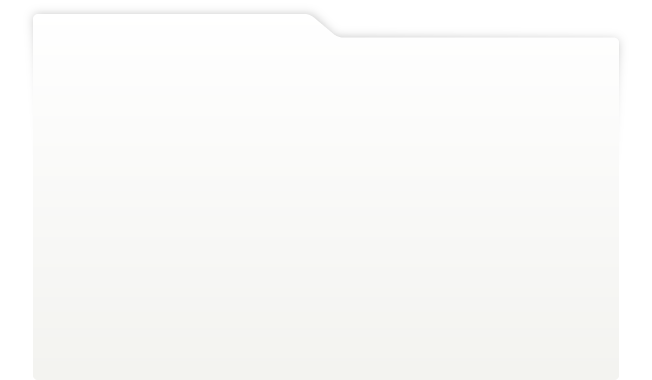
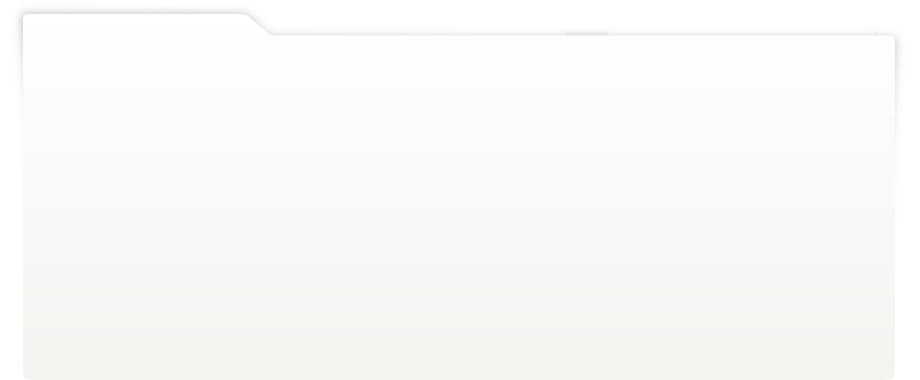
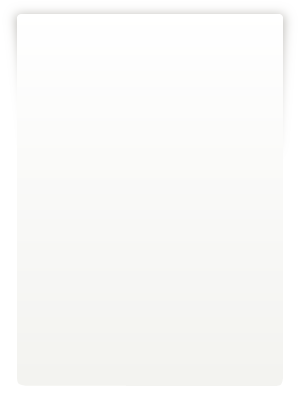
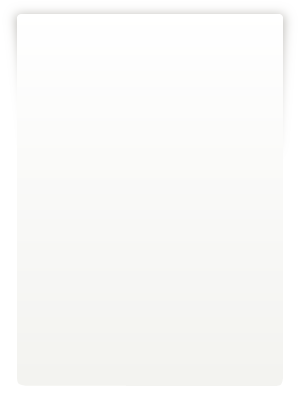
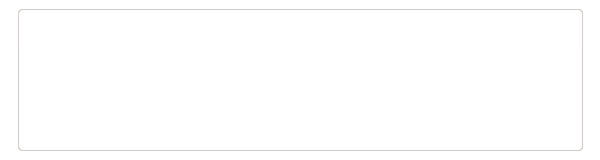
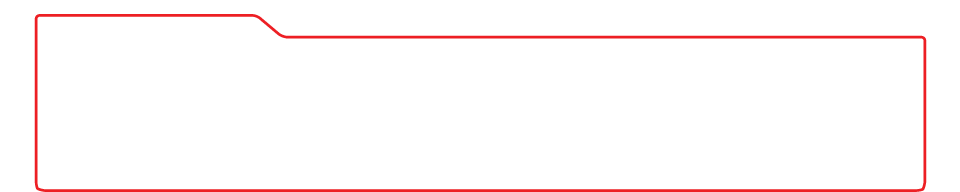
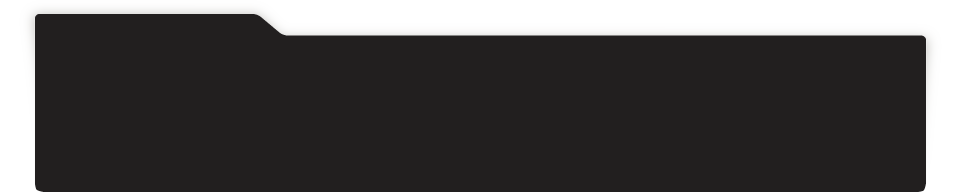
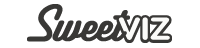
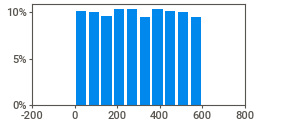
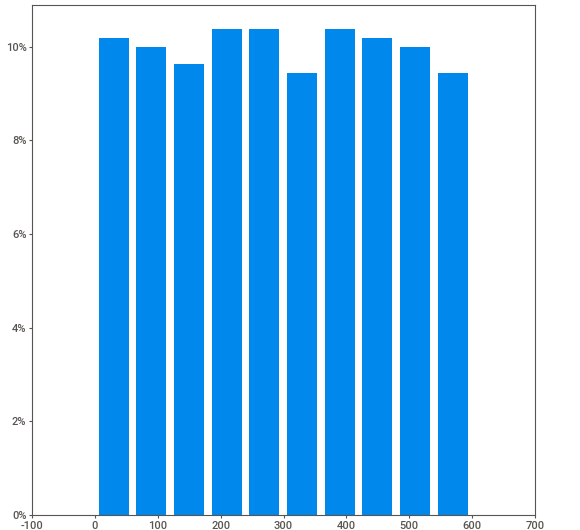
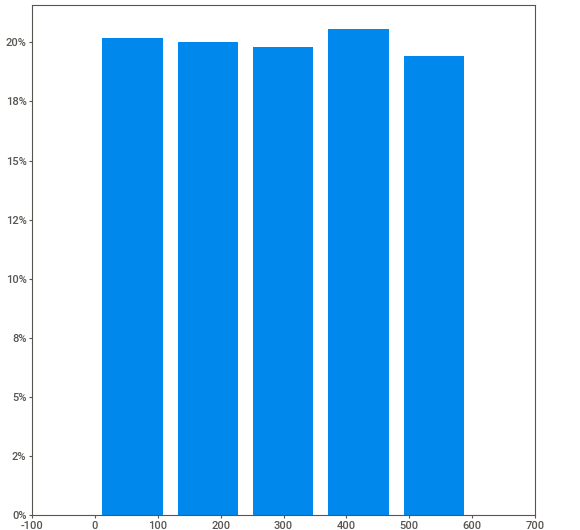
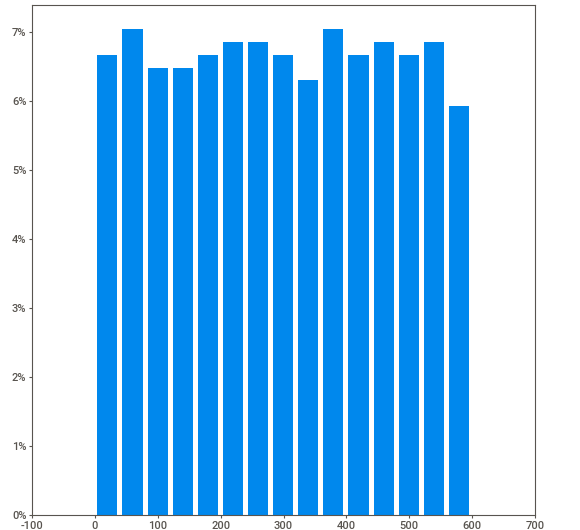
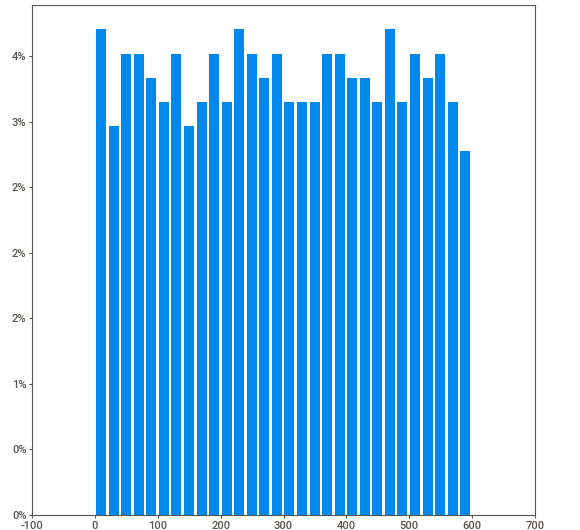
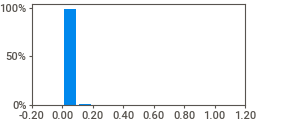
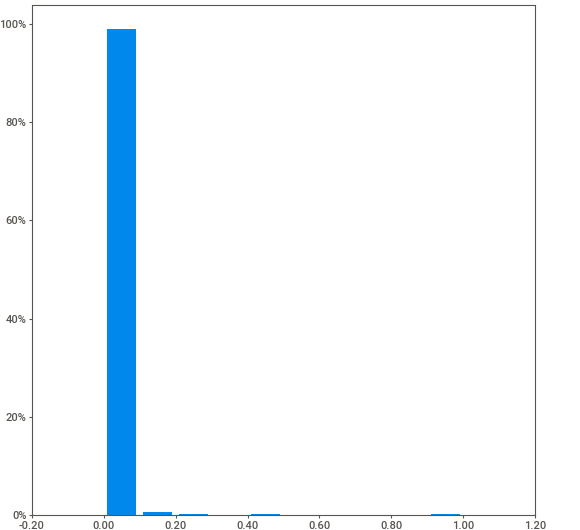
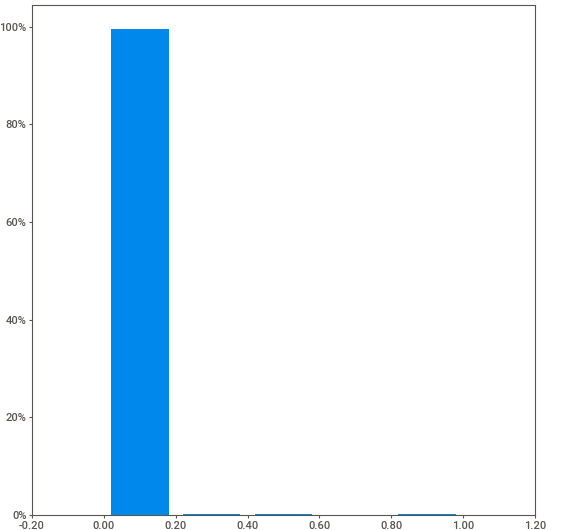
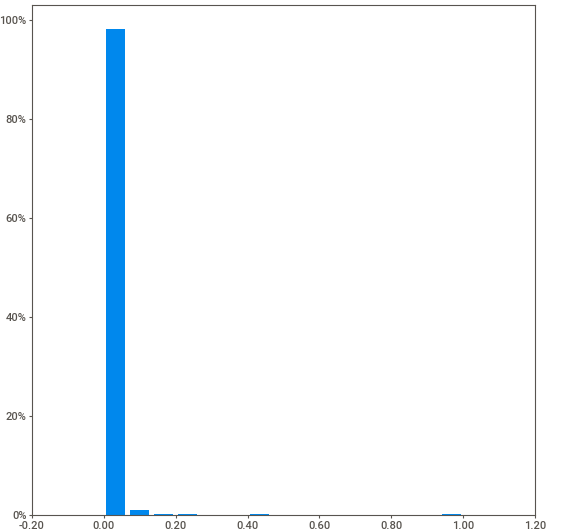
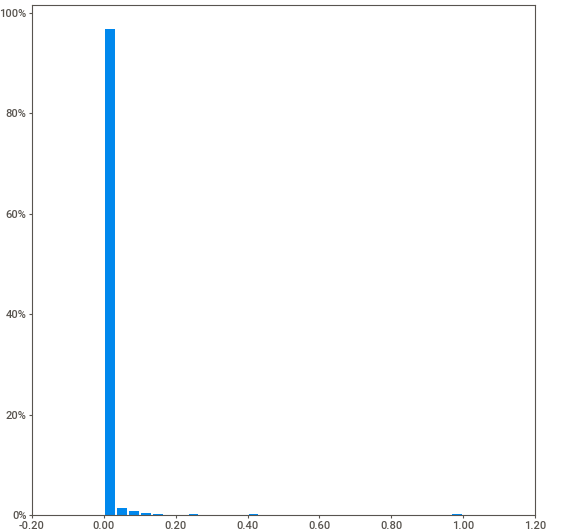
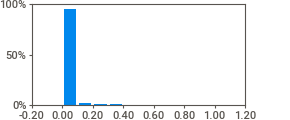
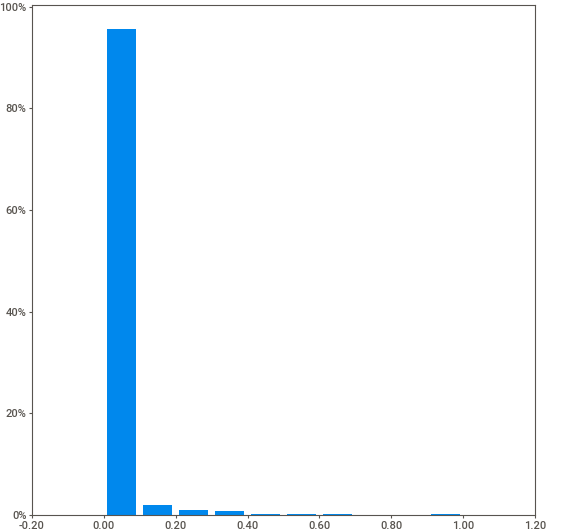
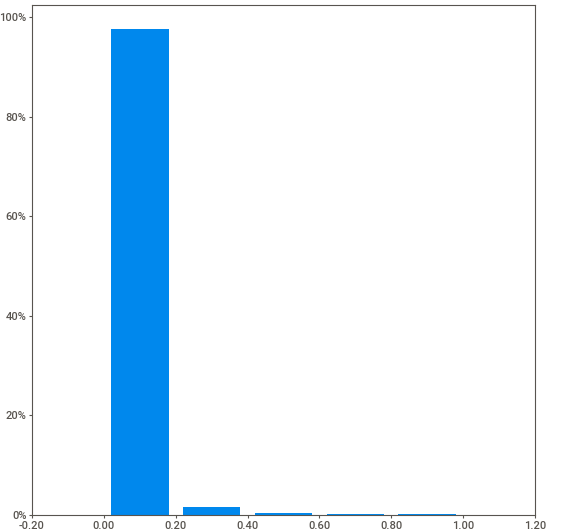
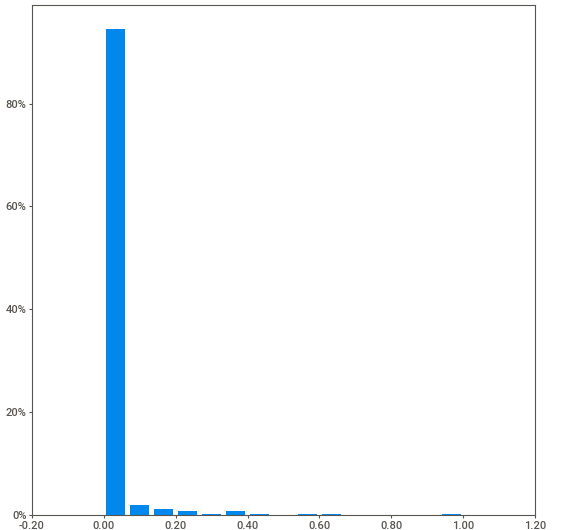
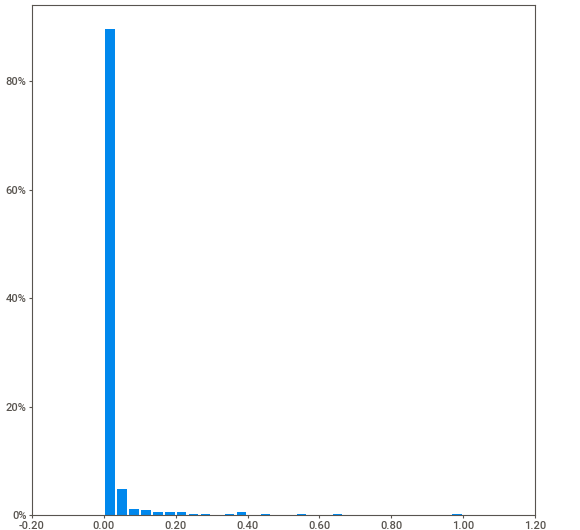
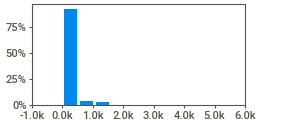
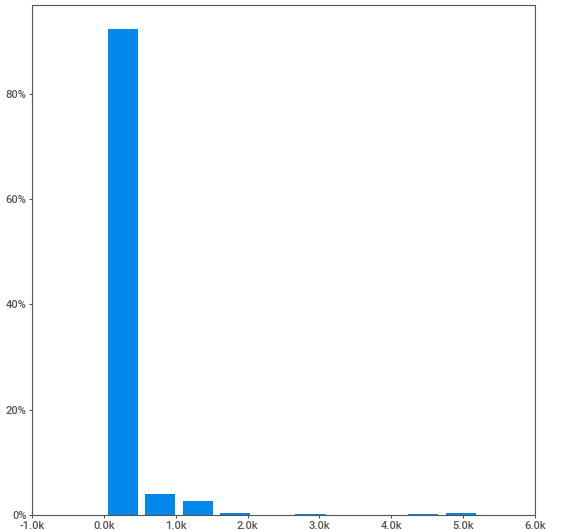
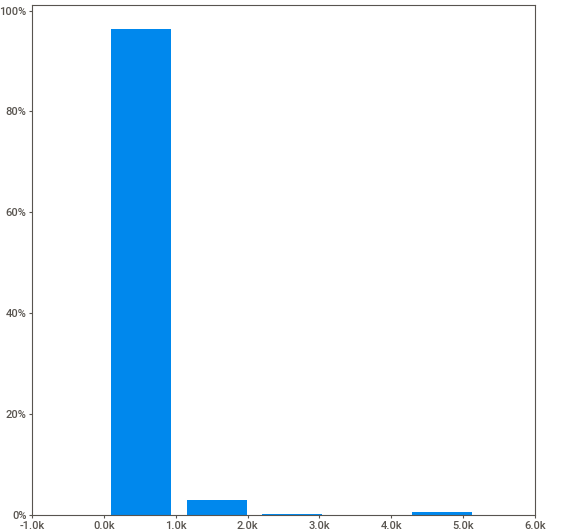
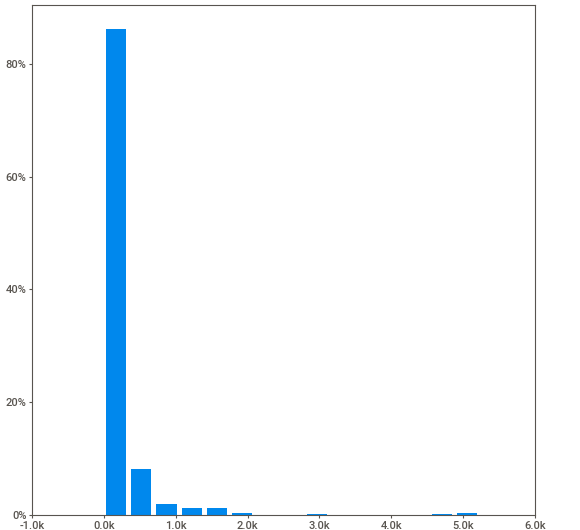
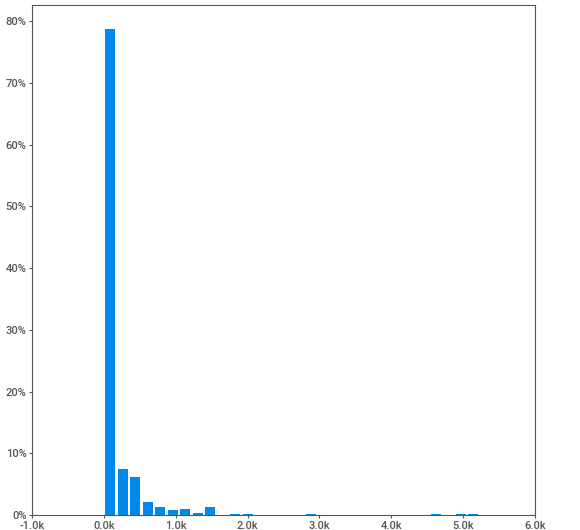
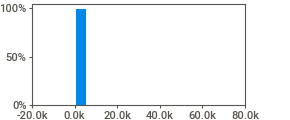
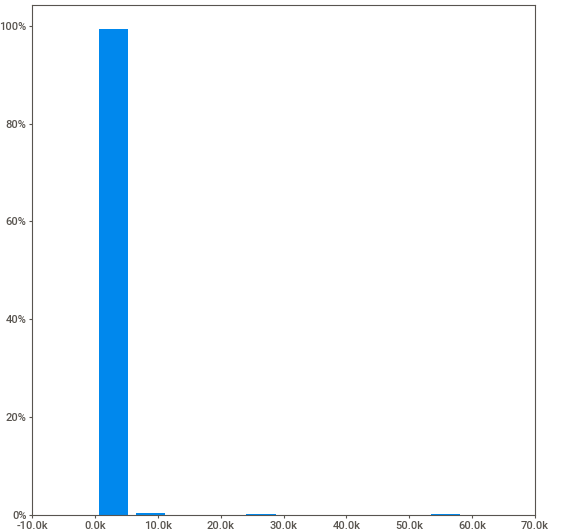
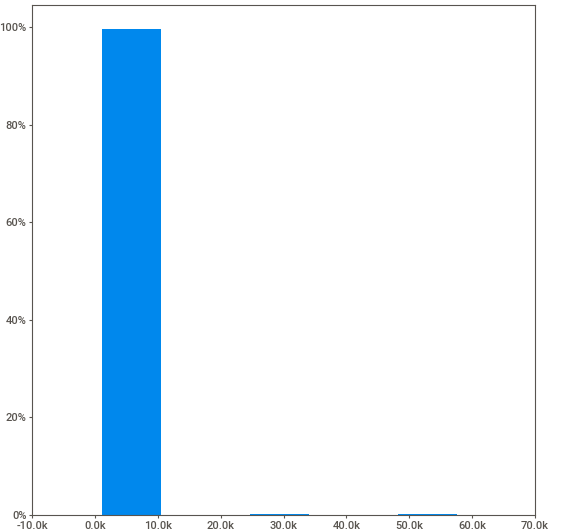
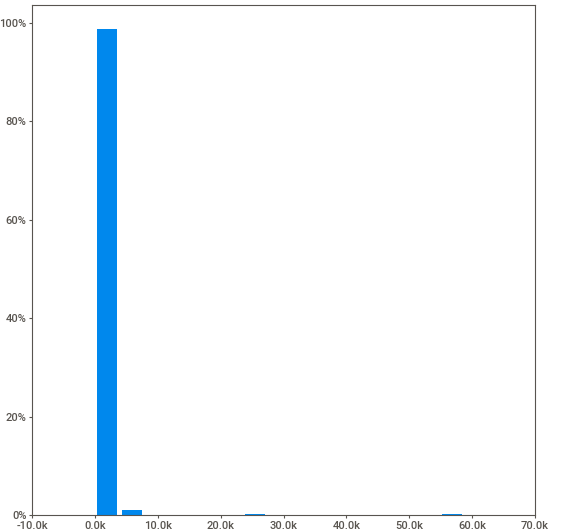
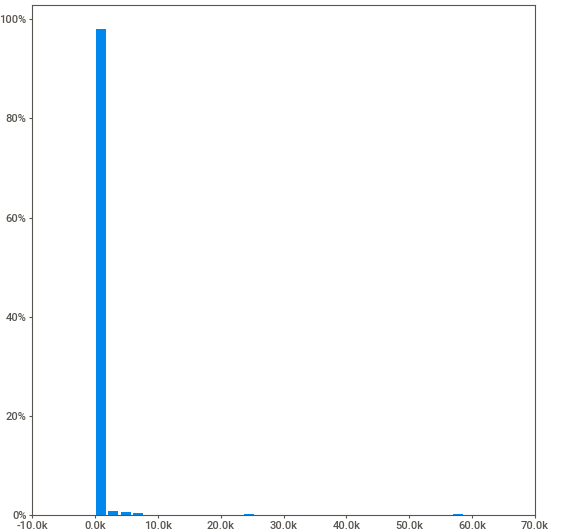
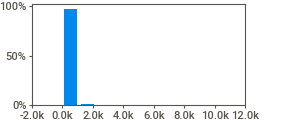
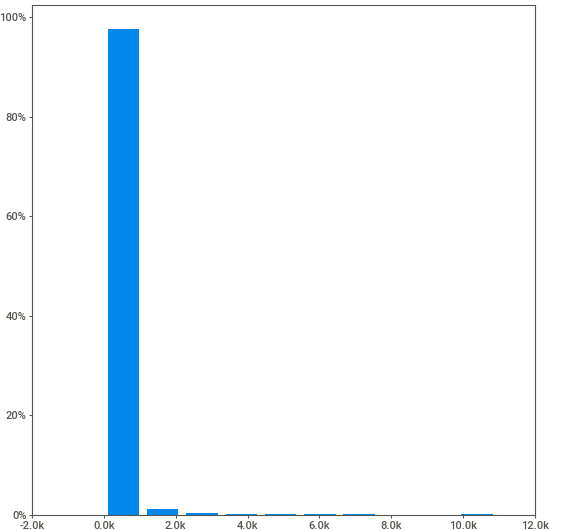
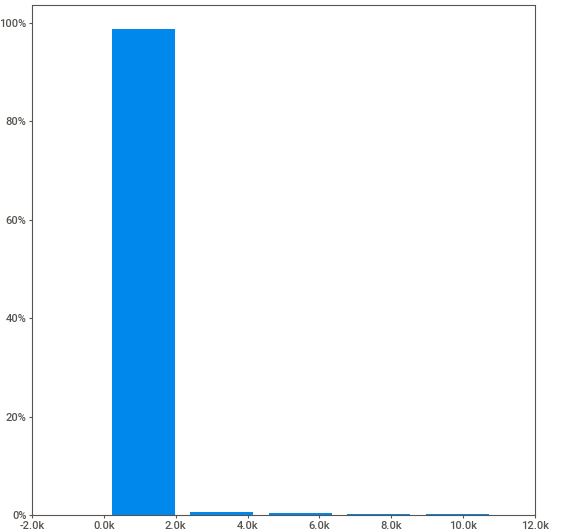
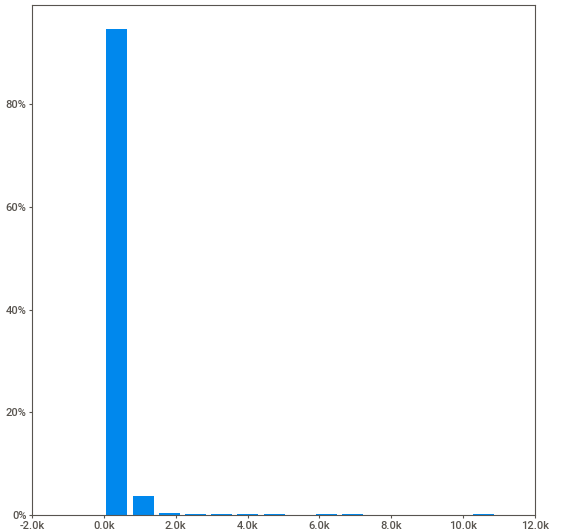
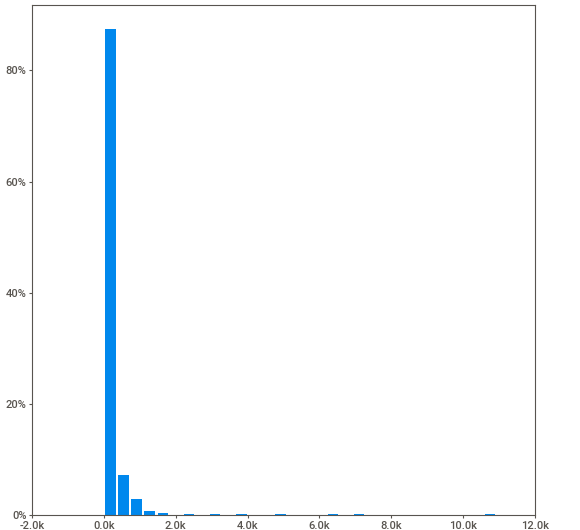
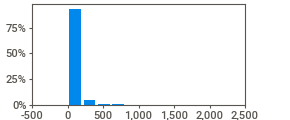
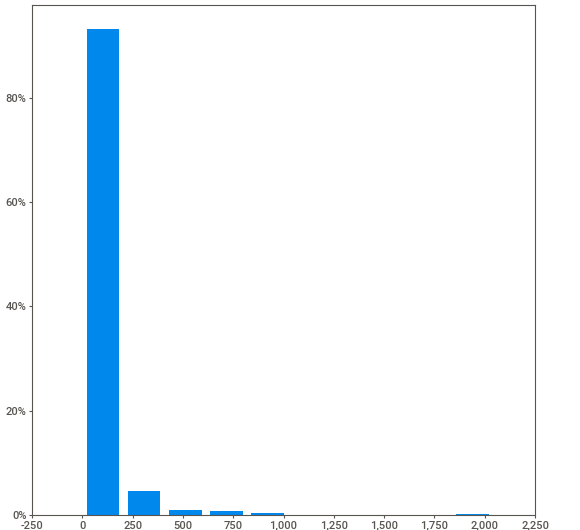
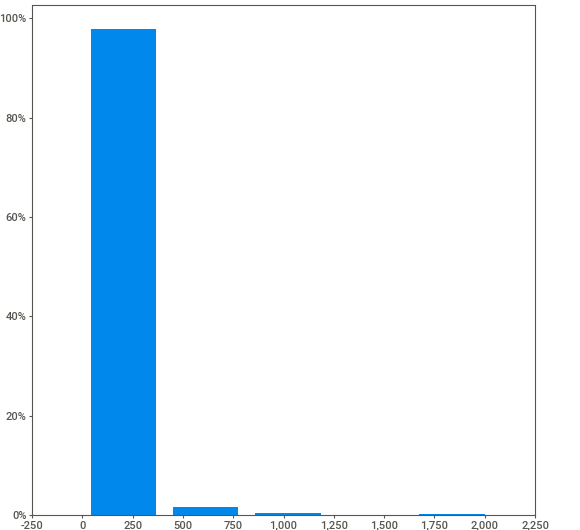
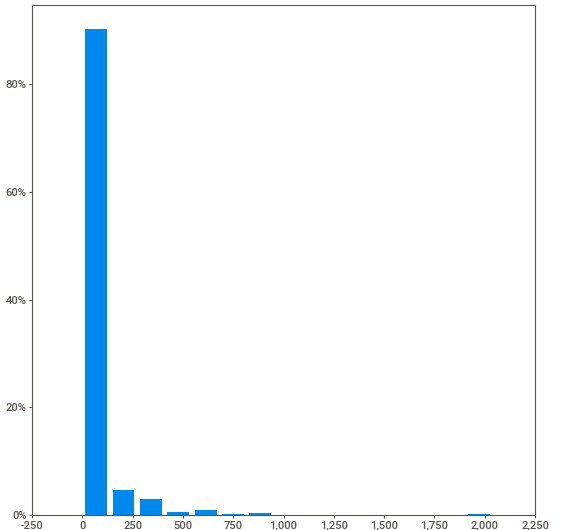
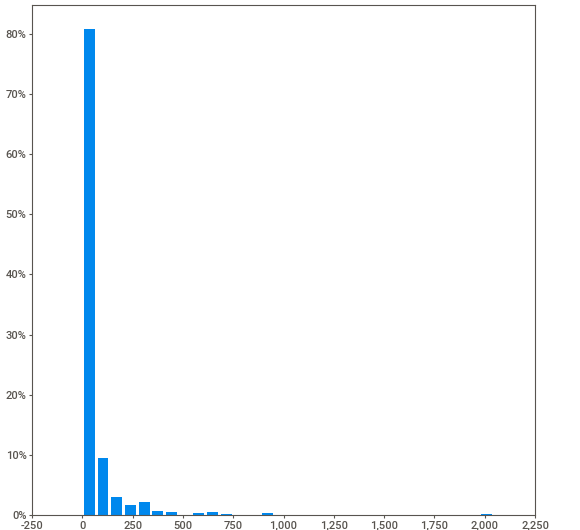
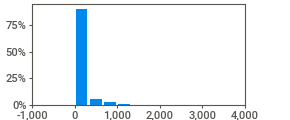
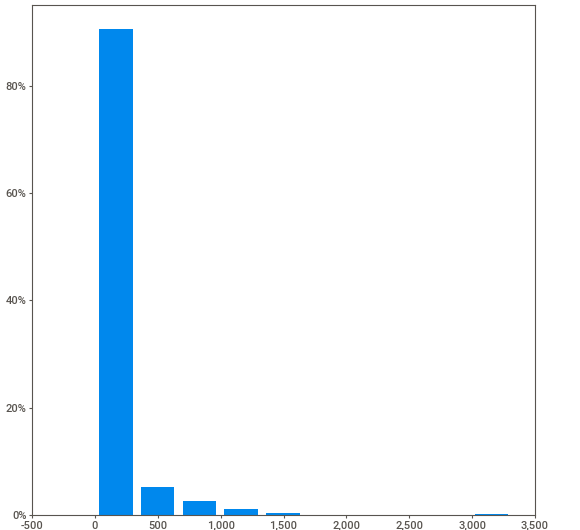
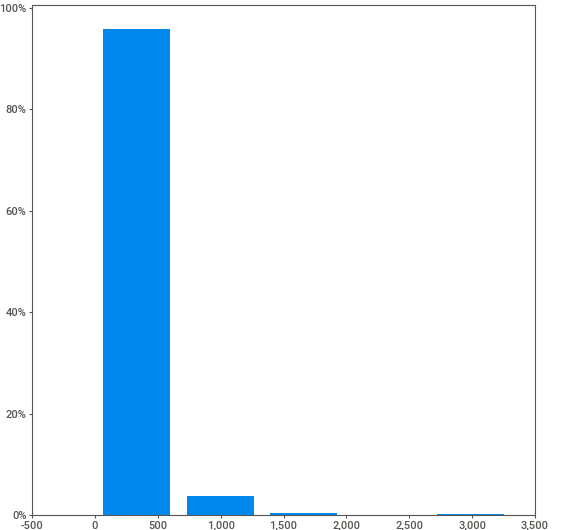
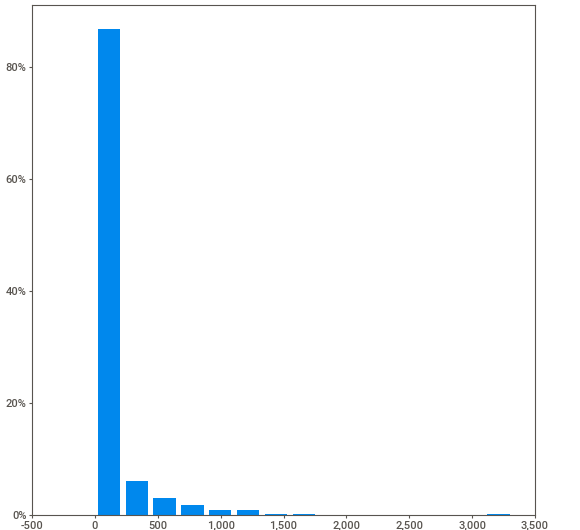
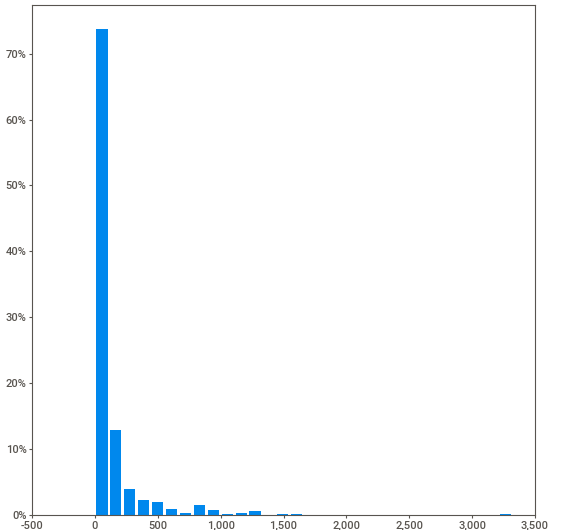
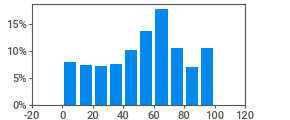
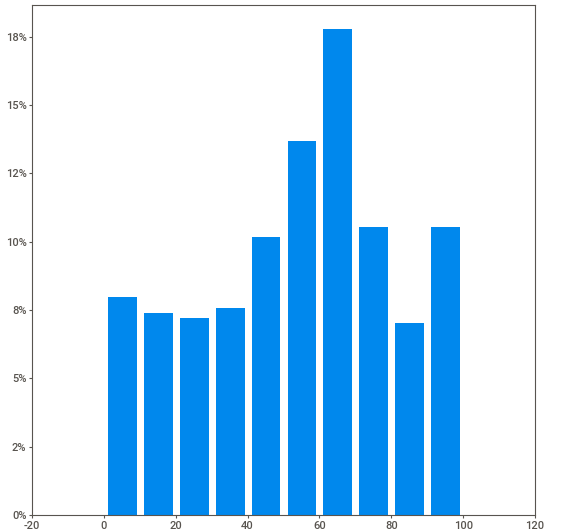
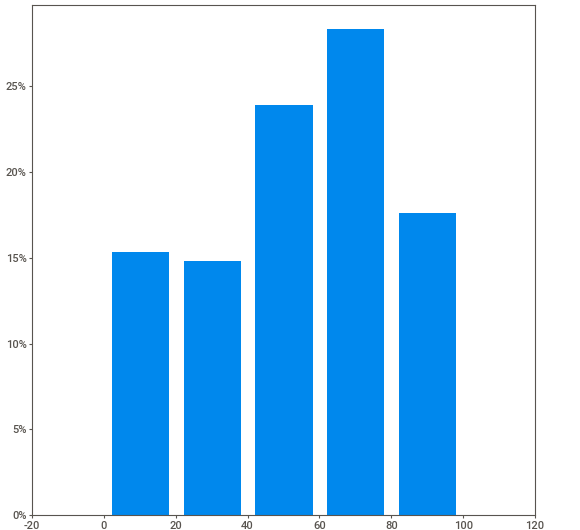
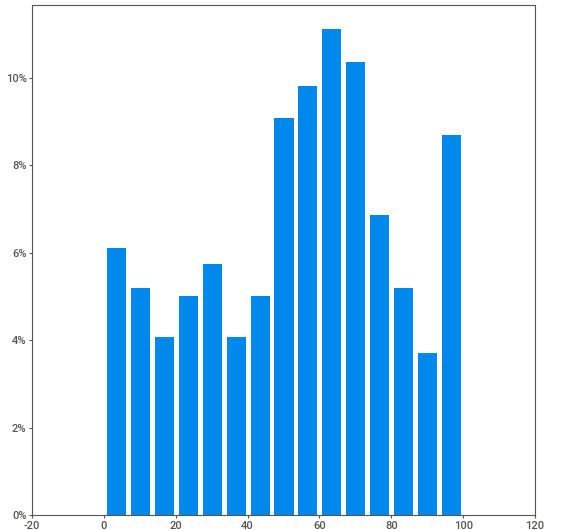
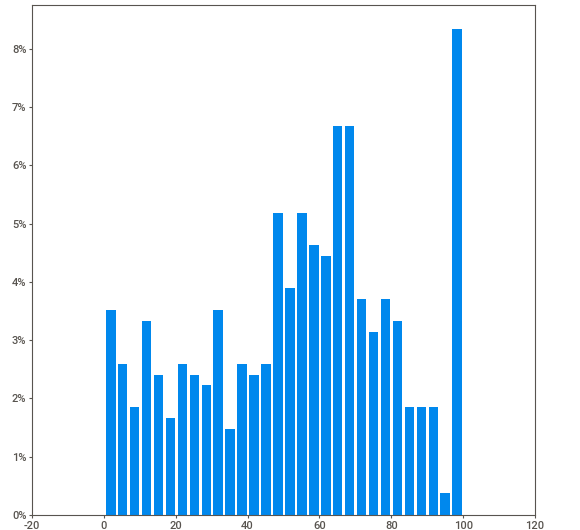
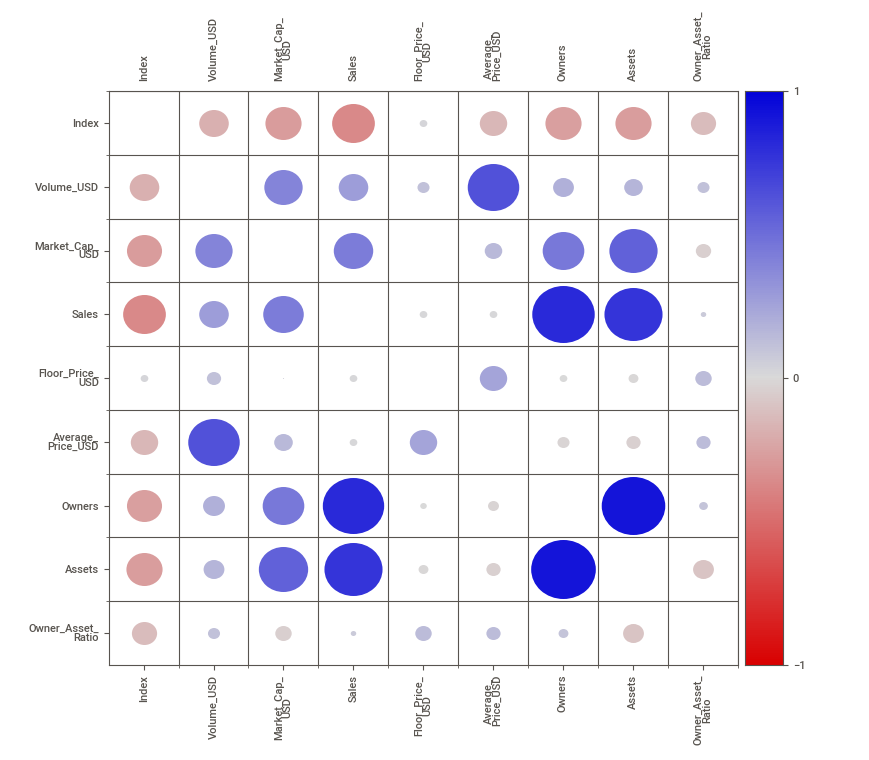
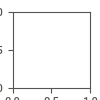

In [ ]:
my_report.show_notebook()